In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from python_scripts import csv_processing as dp
from python_scripts import evaluation

In [2]:
df = pd.read_csv("../data/3year.csv")

Without SMOTE

In [3]:
X_train, X_test, y_train, y_test = dp.get_train_test(df)

With SMOTE

In [6]:
X_train, X_test, y_train, y_test = dp.pre_process(df)

In [7]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [8]:
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    objective="binary:logistic",
    tree_method="hist",
    eta=0.1,
    max_depth=3,
    enable_categorical=True,
)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
evaluation.print_res(y_test, y_pred)

Confusion Matrix:
 [[2554  445]
 [  66   86]]
Accuracy: 0.838
Precision Score: 0.162
Recall Score: 0.566
F1 Score: 0.252
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      2999
           1       0.16      0.57      0.25       152

    accuracy                           0.84      3151
   macro avg       0.57      0.71      0.58      3151
weighted avg       0.94      0.84      0.88      3151



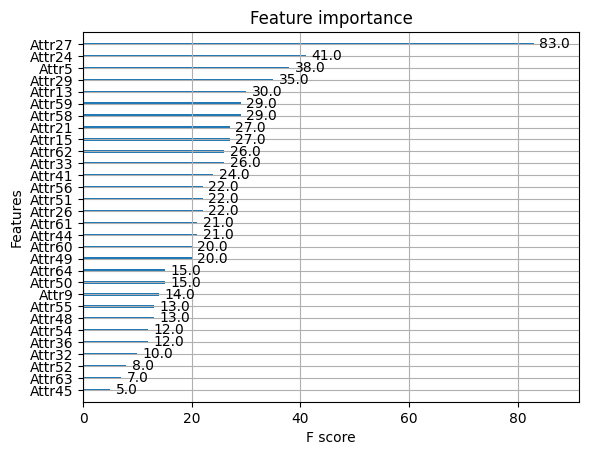

In [33]:
# Plot feature importance
xgb.plot_importance(xgb_classifier)
plt.show()